In [69]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [70]:
IND="IND"
SA="SA"
AUS="AUS"
NZ="NZ"
AFG="AFG"
PAK="PAK"
BAN="BAN"
SL="SL"
ENG="ENG"
NED="NED"

### All Possibilities by recursion

In [71]:
points_map = {IND:9, SA:7, AUS:7, NZ:5, AFG:4, PAK:4, BAN:2, SL:2, ENG:3, NED:2}
rem_match = []
rem_match_count = len(rem_match)
pref_team = [IND, SA, AUS, NZ, PAK, AFG, ENG, BAN, SL, NED]
pref_team.reverse()

In [72]:
final_scores = {IND:[0,0,0,0,0,0,0,0,0,0],
                 SA:[0,0,0,0,0,0,0,0,0,0],
                 AUS:[0,0,0,0,0,0,0,0,0,0],
                 NZ:[0,0,0,0,0,0,0,0,0,0],
                 AFG:[0,0,0,0,0,0,0,0,0,0],
                 PAK:[0,0,0,0,0,0,0,0,0,0],
                 BAN:[0,0,0,0,0,0,0,0,0,0],
                 SL:[0,0,0,0,0,0,0,0,0,0],
                 ENG:[0,0,0,0,0,0,0,0,0,0],
                 NED:[0,0,0,0,0,0,0,0,0,0]}

In [73]:
def complete_matches(points_map, rem_match, final_scores, pref_team):
    if not rem_match:
        curr_tup = [(k,v) for k,v in points_map.items()]
        curr_tup.sort(reverse=True, key=lambda x: (x[1], pref_team.index(x[0])))
        for i, (team, point) in enumerate(curr_tup):
            final_scores[team][i] += 1
        return
    curr_match = rem_match.pop()
    next_rem_match = rem_match.copy()
    next_points_map = points_map.copy()
    next_points_map[curr_match[0]] += 1
    complete_matches(next_points_map, next_rem_match, final_scores, pref_team)
    next_points_map = points_map.copy()
    next_rem_match = rem_match.copy()
    next_points_map[curr_match[1]] += 1
    complete_matches(next_points_map, next_rem_match, final_scores, pref_team)
    return


In [74]:
complete_matches(points_map, rem_match, final_scores, pref_team)

In [75]:
for k, v in final_scores.items():
    final_scores[k] = [round((x / sum(v))*100, 2) for x in v]
final_scores

{'IND': [100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'SA': [0.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'AUS': [0.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'NZ': [0.0, 0.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'AFG': [0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0],
 'PAK': [0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'BAN': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0],
 'SL': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0],
 'ENG': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0, 0.0],
 'NED': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0]}

In [76]:
path = f'./RECURSION/recursion_{rem_match_count}.txt'
with open(path, 'w') as f:
    for k, v in final_scores.items():
        f.write(f'{str(k):3} : {str(v)}\n')

In [77]:
path = f'./RECURSION/recursion_{rem_match_count}.xlsx'
final_scores_df = pd.DataFrame(final_scores)
final_scores_df.index = range(1, len(final_scores_df) + 1)
final_scores_df.to_excel(path, index_label='Position')
final_scores_df

,IND,SA,AUS,NZ,AFG,PAK,BAN,SL,ENG,NED
1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0


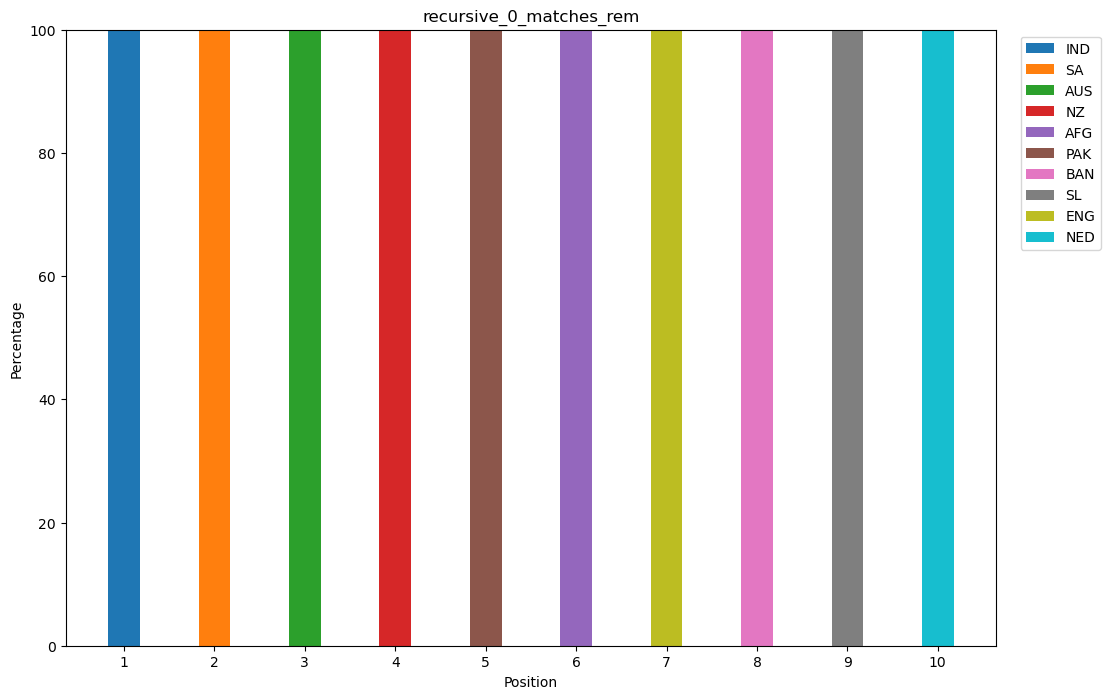

In [78]:
x = np.arange(len(final_scores.keys()))
bottom = np.zeros(len(final_scores.keys()))

plt.figure(figsize=(12,8))
for k, v in final_scores.items():
    plt.bar(x, v, label = k, bottom=bottom, width=0.35)
    bottom = np.add(bottom, v)

plt.xlabel("Position")
plt.ylabel("Percentage")
plt.title(f'recursive_{rem_match_count}_matches_rem')
plt.xticks(x, [str(i+1) for i in range(len(final_scores.keys()))])
plt.legend(loc='upper right', bbox_to_anchor=(1.12 ,1))
plt.savefig(f'./RECURSION/recursion_{rem_match_count}.png')
plt.show()

### Monte Carlo Approach

In [79]:
points_map = {IND:9, SA:7, AUS:7, NZ:5, AFG:4, PAK:4, BAN:2, SL:2, ENG:3, NED:2}
rem_match = []
rem_match_count = len(rem_match)
pref_team = [IND, SA, AUS, NZ, PAK, AFG, ENG, BAN, SL, NED]
pref_team.reverse()

In [80]:
final_scores_mc = {IND:[0,0,0,0,0,0,0,0,0,0],
                 SA:[0,0,0,0,0,0,0,0,0,0],
                 AUS:[0,0,0,0,0,0,0,0,0,0],
                 NZ:[0,0,0,0,0,0,0,0,0,0],
                 AFG:[0,0,0,0,0,0,0,0,0,0],
                 PAK:[0,0,0,0,0,0,0,0,0,0],
                 BAN:[0,0,0,0,0,0,0,0,0,0],
                 SL:[0,0,0,0,0,0,0,0,0,0],
                 ENG:[0,0,0,0,0,0,0,0,0,0],
                 NED:[0,0,0,0,0,0,0,0,0,0]}

In [81]:
for i in range(1, 100000):
    temp_points_map = points_map.copy()
    for match in rem_match:
        win_prob = random.randint(0,1)
        temp_points_map[match[0]] = temp_points_map[match[0]]+1 if win_prob == 1 else temp_points_map[match[0]]
        temp_points_map[match[1]] = temp_points_map[match[1]]+1 if win_prob == 0 else temp_points_map[match[1]]
    curr_tup = [(k,v) for k,v in temp_points_map.items()]
    curr_tup.sort(reverse=True, key=lambda x: (x[1], pref_team.index(x[0])))
    for i, (team, point) in enumerate(curr_tup):
        final_scores_mc[team][i] += 1

In [82]:
for k, v in final_scores_mc.items():
    final_scores_mc[k] = [round((x / sum(v))*100, 2) for x in v]

In [83]:
path = f'./MONTE_CARLO/monte_carlo_{rem_match_count}.txt'
with open(path, 'w') as f:
    for k, v in final_scores_mc.items():
        f.write(f'{str(k):3} : {str(v)}\n')

In [84]:
path = f'./MONTE_CARLO/monte_carlo_{rem_match_count}.xlsx'
final_scores_df = pd.DataFrame(final_scores_mc)
final_scores_df.index = range(1, len(final_scores_df) + 1)
final_scores_df.to_excel(path, index_label='Position')
final_scores_df

,IND,SA,AUS,NZ,AFG,PAK,BAN,SL,ENG,NED
1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0


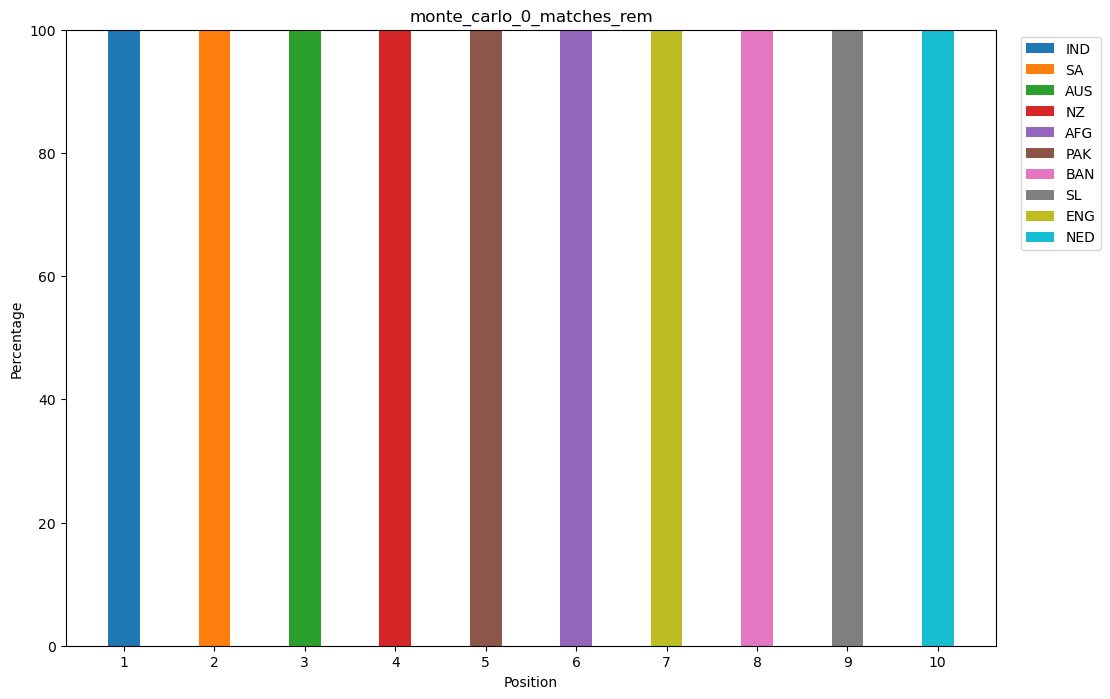

In [85]:
x = np.arange(len(final_scores_mc.keys()))
bottom = np.zeros(len(final_scores_mc.keys()))

plt.figure(figsize=(12,8))
for k, v in final_scores_mc.items():
    plt.bar(x, v, label = k, bottom=bottom, width=0.35)
    bottom = np.add(bottom, v)

plt.xlabel("Position")
plt.ylabel("Percentage")
plt.title(f'monte_carlo_{rem_match_count}_matches_rem')
plt.xticks(x, [str(i+1) for i in range(len(final_scores_mc.keys()))])
plt.legend(loc='upper right', bbox_to_anchor=(1.12 ,1))
plt.savefig(f'./MONTE_CARLO/monte_carlo_{rem_match_count}.png')
plt.show()